In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Loan_Data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [3]:
df.shape

(45000, 14)

In [4]:
df.isnull().sum()

person_age                         0
person_gender                      0
person_education                   0
person_income                     18
person_emp_exp                     0
person_home_ownership              0
loan_amnt                          0
loan_intent                        0
loan_int_rate                      4
loan_percent_income                0
cb_person_cred_hist_length         0
credit_score                       0
previous_loan_defaults_on_file     0
loan_status                        0
dtype: int64

# Data Cleaning

In [5]:
# Fill Person Income Null Values
df['person_income'] = df['person_income'].fillna(df['person_income'].mean())

In [6]:
# Fill Loan Interest Rate Null Values
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

# Data Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

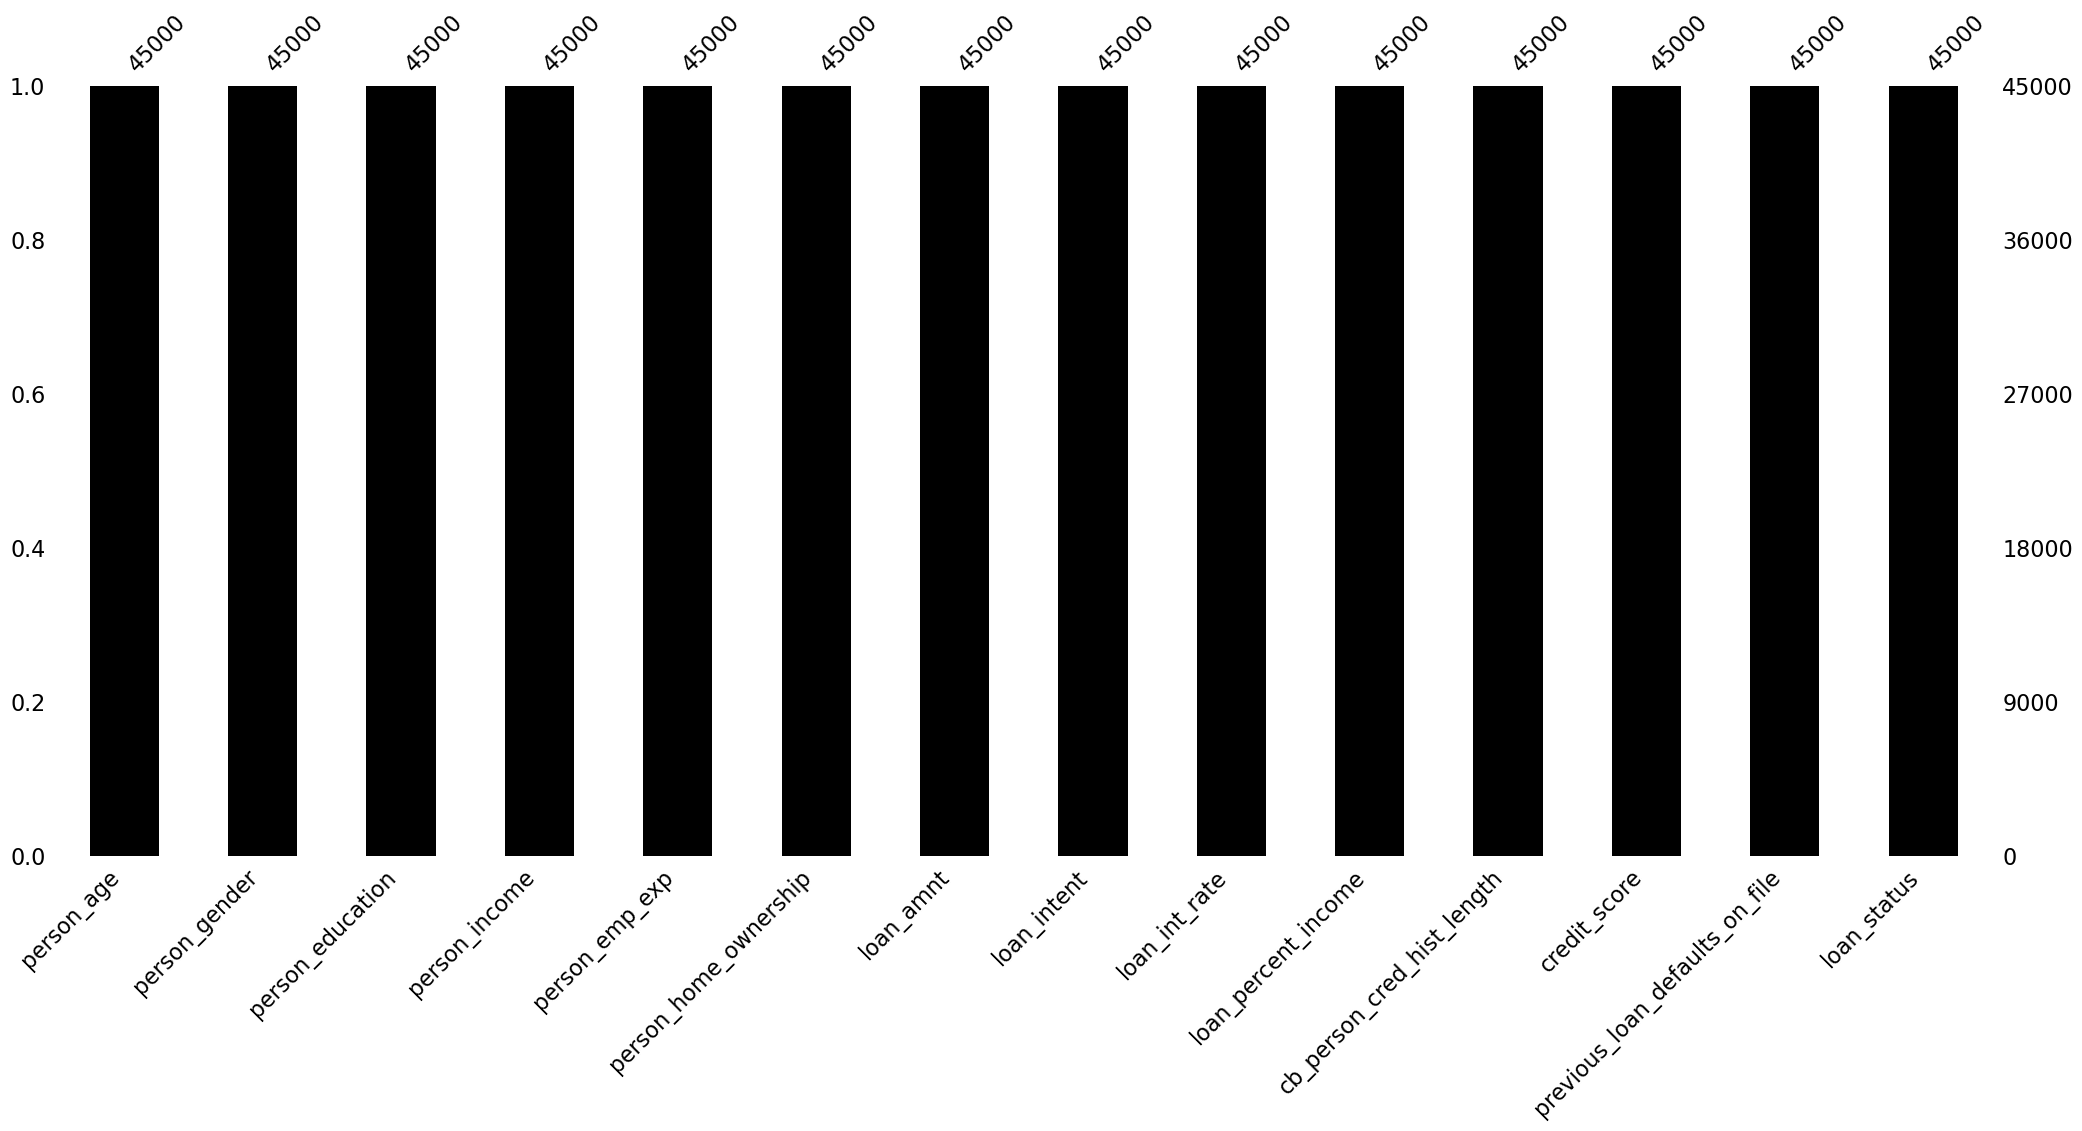

In [8]:
msno.bar(df,color='black')  
plt.show()  

<Axes: xlabel='person_education', ylabel='count'>

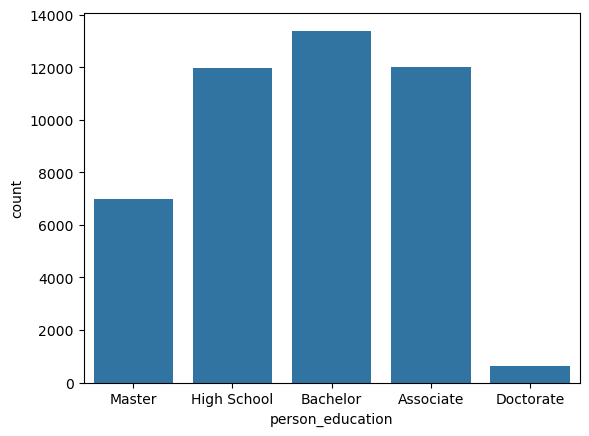

In [9]:
sns.countplot(x = df['person_education'])

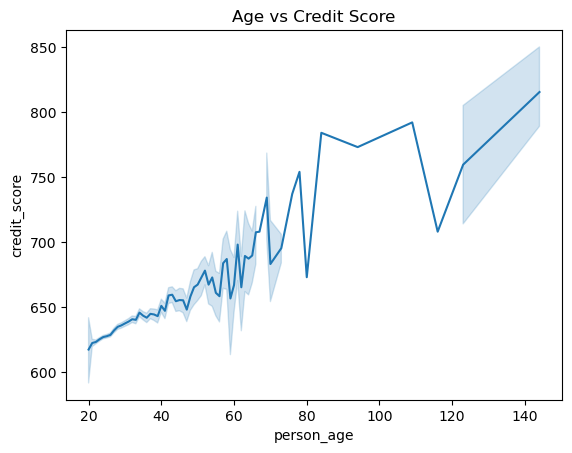

In [10]:
# Count of Credit Score by Age Groups
sns.lineplot(x='person_age' , y='credit_score' , data=df)
plt.title('Age vs Credit Score')
plt.show()

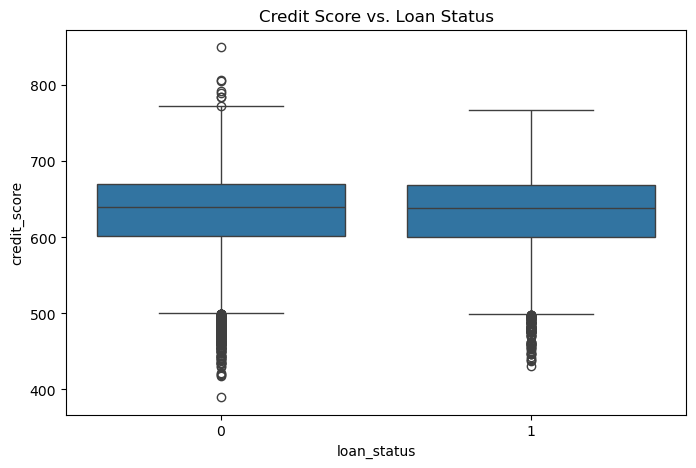

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='credit_score', data=df)
plt.title('Credit Score vs. Loan Status')
plt.show()


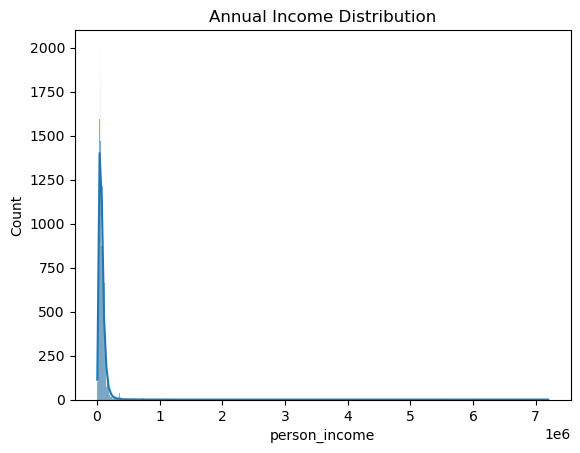

In [12]:
# This Graph show Annual Income Distribution of Customers
sns.histplot(df['person_income'], kde=True,)
plt.title('Annual Income Distribution')
plt.show()

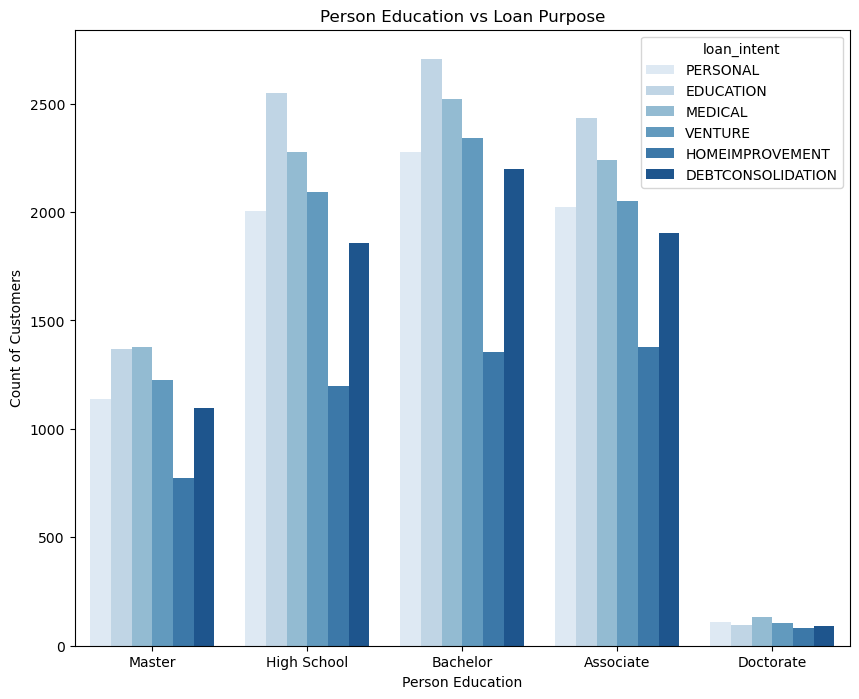

In [13]:
# This graph shows Loan Purpure of Customer from Different Occupation
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='person_education', hue='loan_intent', palette='Blues')
plt.title('Person Education vs Loan Purpose')
plt.xlabel('Person Education')
plt.ylabel('Count of Customers')
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

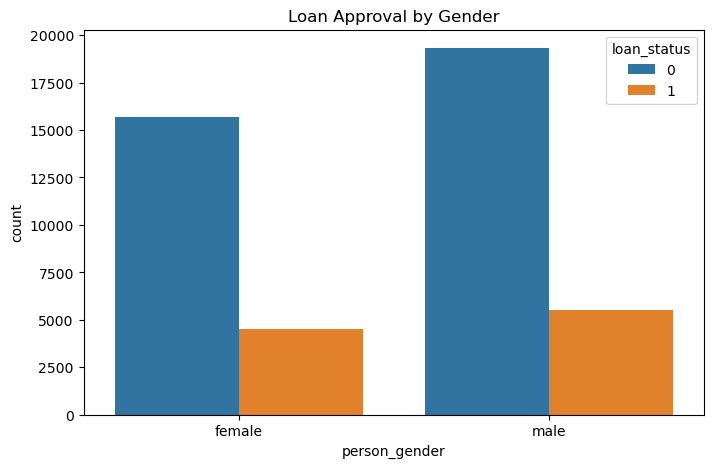

In [15]:

plt.figure(figsize=(8,5))
sns.countplot(x='person_gender' , hue='loan_status' , data=df)
plt.title('Loan Approval by Gender')
plt.show()

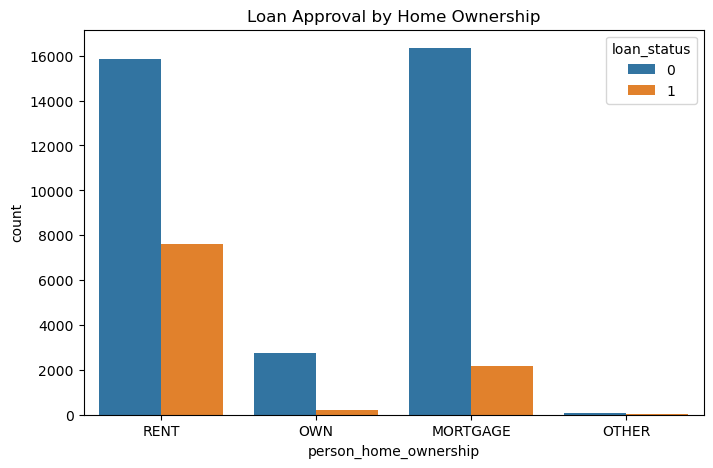

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title('Loan Approval by Home Ownership')
plt.show()


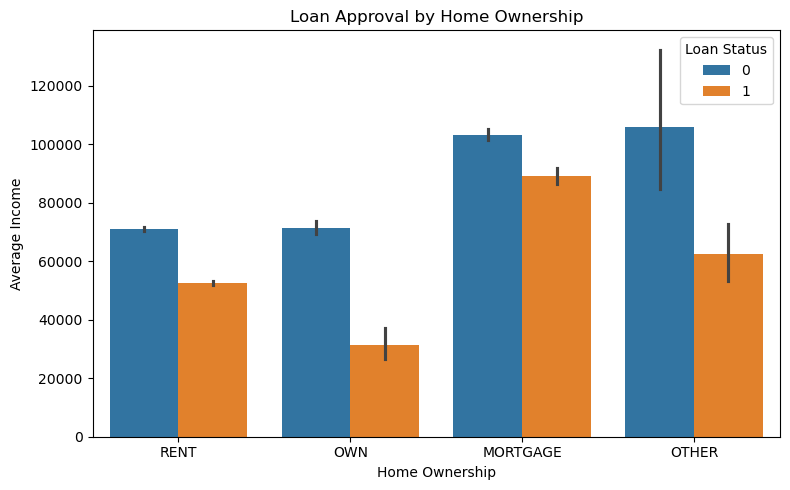

In [17]:
# Here Bar Graph shows Loan Approval by Home Ownership
plt.figure(figsize=(8, 5))
sns.barplot(x='person_home_ownership', y='person_income', hue='loan_status', data=df)
plt.title('Loan Approval by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Average Income')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

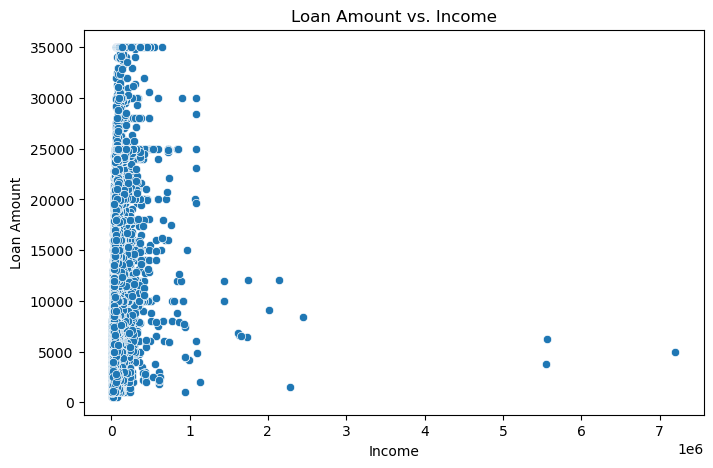

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='person_income', y='loan_amnt', data=df)
plt.title('Loan Amount vs. Income')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()


# Data Encoding

In [19]:
# Encode Gender Column Using Label Encoding
encoder = LabelEncoder()
encoded_gender = encoder.fit_transform(df['person_gender'])
encoded_gender_df = pd.DataFrame(encoded_gender,columns=['Gender_Encoded'])
df = pd.concat([df,encoded_gender_df],axis=1)
df.drop(['person_gender'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_education                45000 non-null  object 
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   person_home_ownership           45000 non-null  object 
 5   loan_amnt                       45000 non-null  int64  
 6   loan_intent                     45000 non-null  object 
 7   loan_int_rate                   45000 non-null  float64
 8   loan_percent_income             45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  int64  
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  45000 non-null  object 
 12  loan_status                     

In [21]:
# Encode person_education Column Using Label Encoding
encoder = LabelEncoder()
encoded_person_education = encoder.fit_transform(df['person_education'])
encoded_person_education_df = pd.DataFrame(encoded_person_education,columns=['person_education_Encoded'])
df = pd.concat([df,encoded_person_education_df],axis=1)
df.drop(['person_education'],axis=1,inplace=True)

In [22]:
# Encode loan_intent Column Using Label Encoding
encoder = LabelEncoder()
encoded_loan_intent = encoder.fit_transform(df['loan_intent'])
encoded_loan_intent_df = pd.DataFrame(encoded_loan_intent,columns=['loan_intent_Encoded'])
df = pd.concat([df,encoded_loan_intent_df],axis=1)
df.drop(['loan_intent'],axis=1,inplace=True)

In [23]:
# Encode person_home_ownership Column Using Label Encoding
encoder = LabelEncoder()
encoded_person_home_ownership = encoder.fit_transform(df['person_home_ownership'])
encoded_person_home_ownership_df = pd.DataFrame(encoded_person_home_ownership,columns=['person_home_ownership_Encoded'])
df = pd.concat([df,encoded_person_home_ownership_df],axis=1)
df.drop(['person_home_ownership'],axis=1,inplace=True)

In [24]:
# Encode previous_loan_defaults_on_file Using Label Encoding
encoded_previous_loan_defaults_on_file = encoder.fit_transform(df['previous_loan_defaults_on_file'])
encoded_previous_loan_defaults_on_file_df = pd.DataFrame(encoded_previous_loan_defaults_on_file,columns=['previous_loan_defaults_on_file_Encoded'])
df = pd.concat([df,encoded_previous_loan_defaults_on_file_df],axis=1)
df.drop(['previous_loan_defaults_on_file'],axis=1,inplace=True)

In [25]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,Gender_Encoded,person_education_Encoded,loan_intent_Encoded,person_home_ownership_Encoded,previous_loan_defaults_on_file_Encoded
0,22,71948.0,0,35000,16.02,0.49,3,561,1,0,4,4,3,0
1,21,12282.0,0,1000,11.14,0.08,2,504,0,0,3,1,2,1
2,25,12438.0,3,5500,12.87,0.44,3,635,1,0,3,3,0,0
3,23,79753.0,0,35000,15.23,0.44,2,675,1,0,1,3,3,0
4,24,66135.0,1,35000,14.27,0.53,4,586,1,1,4,3,3,0


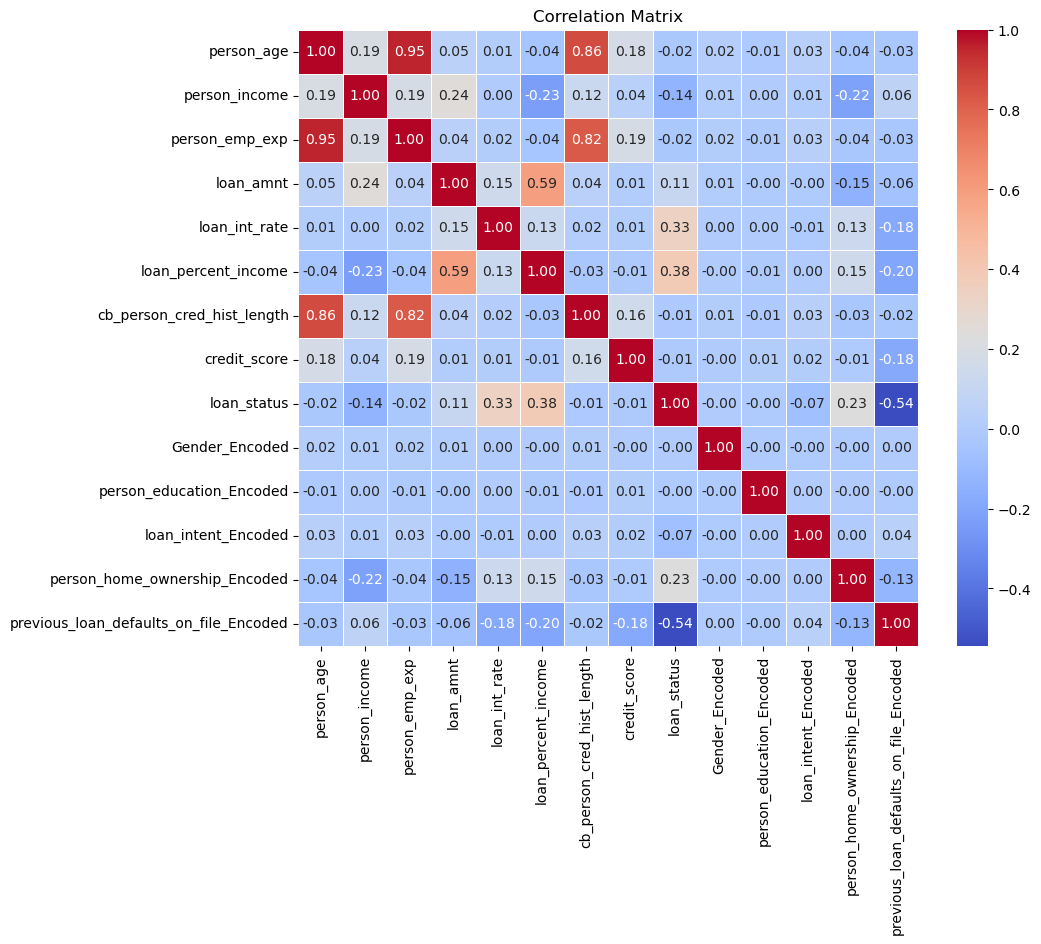

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Selecting Features 

In [27]:
x = df.drop(['loan_status'],axis=1)
y = df['loan_status']

# Spliting Data into Training and Testing

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 42)

# Model Training and Evaluation

In [29]:
# Here we Apply Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
LR_report = classification_report(y_test,y_pred)
print(LR_report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10493
           1       0.67      0.55      0.61      3007

    accuracy                           0.84     13500
   macro avg       0.78      0.74      0.75     13500
weighted avg       0.83      0.84      0.83     13500



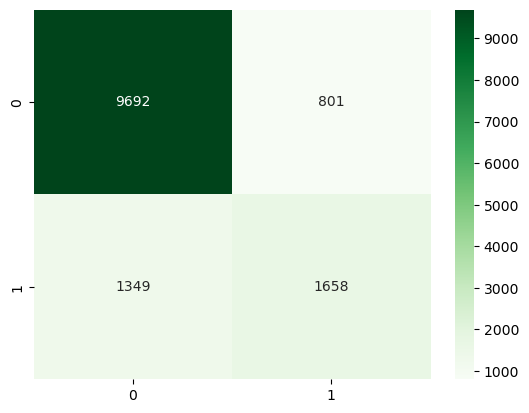

In [66]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap="Greens", annot=True,  fmt='d')
plt.show()

In [33]:
# Here we Apply  Decision Tree Classifier
dtC = DecisionTreeClassifier(random_state=42)
dtC.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred_dtC = dtC.predict(x_test)
y_pred_dtC

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
dfC_report = classification_report(y_test,y_pred_dtC)
print(dfC_report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10493
           1       0.76      0.77      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.85      0.85     13500
weighted avg       0.89      0.89      0.89     13500



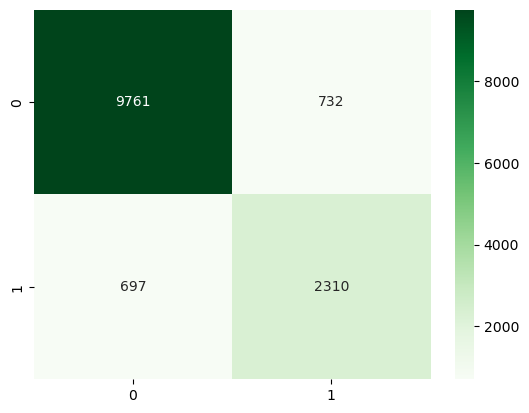

In [71]:
cm_dtC = confusion_matrix(y_test,y_pred_dtC)
sns.heatmap(cm_dtC, cmap="Greens", annot=True,  fmt='d')
plt.show()

In [37]:
# Here we Apply KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [39]:
knn_report = classification_report(y_test,y_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10493
           1       0.63      0.52      0.57      3007

    accuracy                           0.82     13500
   macro avg       0.75      0.72      0.73     13500
weighted avg       0.82      0.82      0.82     13500



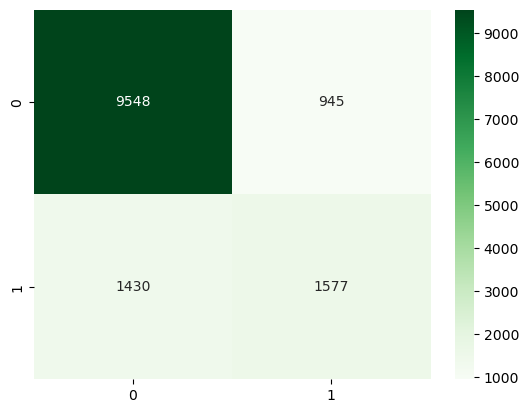

In [72]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn, cmap="Greens", annot=True,  fmt='d')
plt.show()

In [41]:
# Here we Apply Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
y_pred_gb = gb.predict(x_test)
y_pred_gb

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
gb_report = classification_report(y_test,y_pred_gb)
print(gb_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10493
           1       0.87      0.76      0.81      3007

    accuracy                           0.92     13500
   macro avg       0.90      0.86      0.88     13500
weighted avg       0.92      0.92      0.92     13500



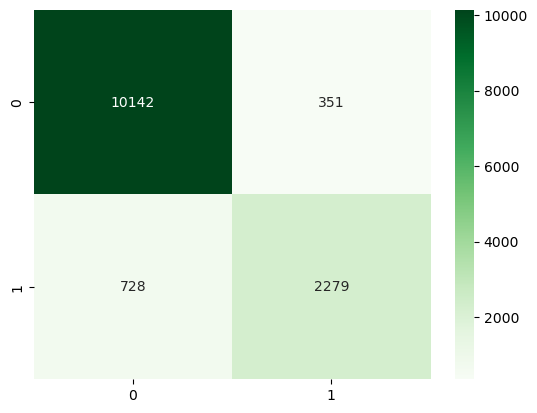

In [69]:
cm_gb = confusion_matrix(y_test,y_pred_gb)
sns.heatmap(cm_gb, cmap="Greens", annot=True,  fmt='d')
plt.show()

In [45]:
import pickle as pkl

In [46]:
pkl.dump(gb,open('gb.pkl','wb'))

In [47]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,Gender_Encoded,person_education_Encoded,loan_intent_Encoded,person_home_ownership_Encoded,previous_loan_defaults_on_file_Encoded
0,22,71948.0,0,35000,16.02,0.49,3,561,1,0,4,4,3,0
1,21,12282.0,0,1000,11.14,0.08,2,504,0,0,3,1,2,1
2,25,12438.0,3,5500,12.87,0.44,3,635,1,0,3,3,0,0
3,23,79753.0,0,35000,15.23,0.44,2,675,1,0,1,3,3,0
4,24,66135.0,1,35000,14.27,0.53,4,586,1,1,4,3,3,0


In [48]:
df_gb = pd.DataFrame({'Actual':y_test.values,'Predicted':y_pred_gb})
df_gb.head()

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


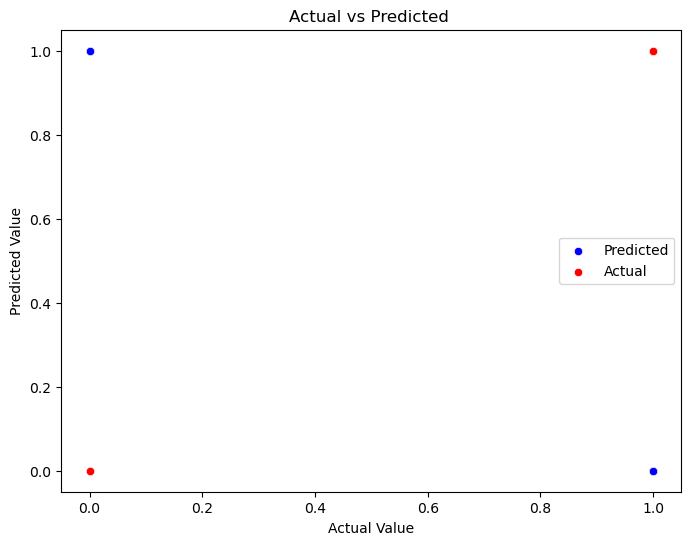

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, color='blue', label='Predicted')
sns.scatterplot(x=y_test , y=y_test , color='red' , label='Actual')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted ")
plt.legend()
plt.show()

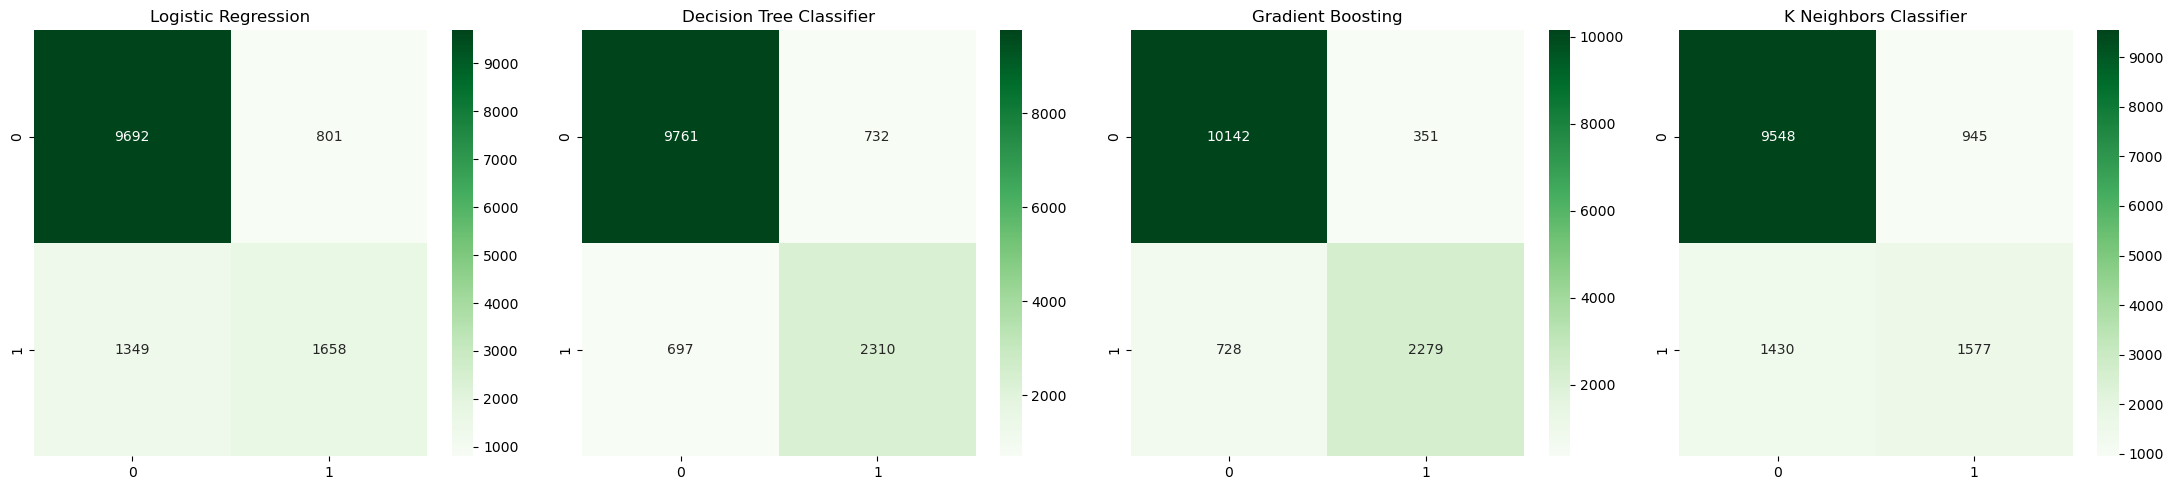

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)  
cm_dtC = confusion_matrix(y_test, y_pred_dtC)  
cm_gb = confusion_matrix(y_test, y_pred_gb)  
cm_knn = confusion_matrix(y_test, y_pred_knn)  


fig, axes = plt.subplots(1, 4, figsize=(22, 5))  

sns.heatmap(cm, cmap="Greens", annot=True, ax=axes[0], fmt='d')
axes[0].set_title("Logistic Regression")

sns.heatmap(cm_dtC, cmap="Greens", annot=True, ax=axes[1], fmt='d')
axes[1].set_title("Decision Tree Classifier")

sns.heatmap(cm_gb, cmap="Greens", annot=True, ax=axes[2], fmt='d')
axes[2].set_title("Gradient Boosting")

sns.heatmap(cm_knn, cmap="Greens", annot=True, ax=axes[3], fmt='d')
axes[3].set_title("K Neighbors Classifier")


plt.tight_layout()
plt.show()


In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   person_age                              45000 non-null  int64  
 1   person_income                           45000 non-null  float64
 2   person_emp_exp                          45000 non-null  int64  
 3   loan_amnt                               45000 non-null  int64  
 4   loan_int_rate                           45000 non-null  float64
 5   loan_percent_income                     45000 non-null  float64
 6   cb_person_cred_hist_length              45000 non-null  int64  
 7   credit_score                            45000 non-null  int64  
 8   Gender_Encoded                          45000 non-null  int32  
 9   person_education_Encoded                45000 non-null  int32  
 10  loan_intent_Encoded                     45000 non-null  in

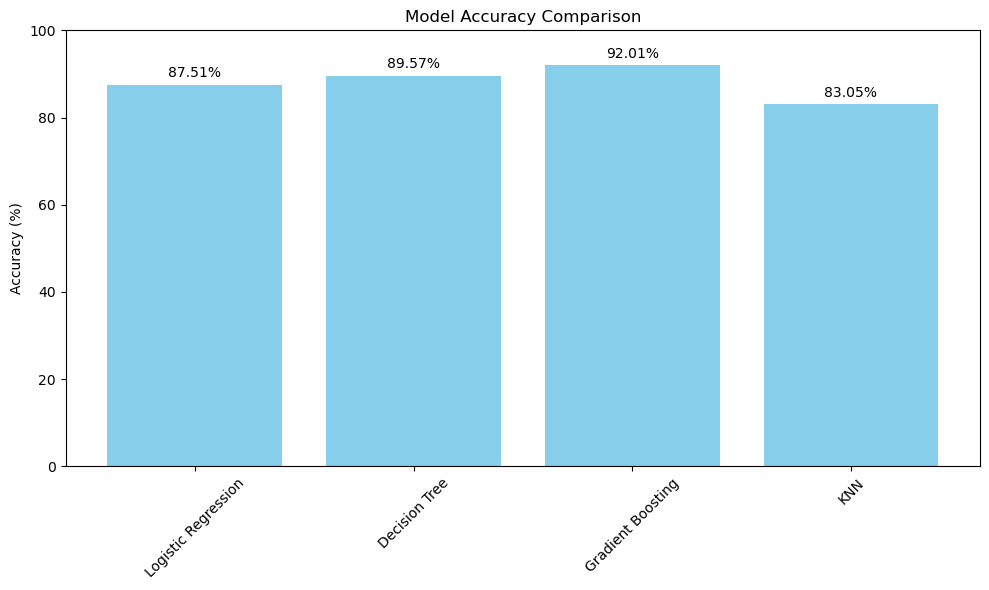

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 100)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,  
        f'{height:.2f}%',  
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()
